## 1. Setup and Load Data

###  Install Dependencies and Setup

- Tensor flow can work with hardware as well,
  It can work with cpu and gpu.

- What does pip actually do? <br>
  The standard package manager for Python is pip . It allows you to install and manage packages that aren't part of the Python     standard library. 

In [138]:
!pip install tensorflow
!pip install opencv-python matplotlib  #open cv do face recognitation,all human related work done in open cv


[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Invalid requirement: '#open'

[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [139]:
!pip list     
# return pip install things

Package                      Version
---------------------------- ------------
absl-py                      1.4.0
altair                       5.0.1
anyio                        3.6.2
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
arrow                        1.2.3
asttokens                    2.2.1
astunparse                   1.6.3
attrs                        22.2.0
backcall                     0.2.0
beautifulsoup4               4.11.2
bleach                       6.0.0
blinker                      1.6.2
cachetools                   5.3.0
certifi                      2022.12.7
cffi                         1.15.1
charset-normalizer           3.1.0
click                        8.1.3
colorama                     0.4.6
comm                         0.1.2
contourpy                    1.0.7
cycler                       0.11.0
debugpy                      1.6.6
decorator                    5.1.1
defusedxml                   0.7.1
executing                    1.2.0
f


[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [140]:
import tensorflow as tf
import os

- The OS module in Python provides functions for creating and removing a directory (folder) <br>
 fetching its contents, changing and identifying the current directory, etc.

In [141]:
gpus = tf.config.experimental.list_physical_devices('CPU')

In [142]:
gpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [143]:
# provide oom errors, for setting up gpu limit
gpus =tf.config.experimental.list_physical_devices('GPU') # minimising ram and gpu
for gpu in gpus:
    tf.config.experimental.set_memory_gorwth(GPU,True) # if more than one GPU all will be used....if 2 GPU both will be used..(it limits memory growth)

In [144]:
tf.config.list_physical_devices('GPU') # it means no GPU available on this device # it will return list of gpu available

[]

### 2.  Remove dodgy images

In [145]:
import cv2 # open cv is used for image recognigation # cv2 is part of open cv
import imghdr # to check file extensions of particular images
from matplotlib import pyplot as plt

In [146]:
data_dir = "data"


In [147]:
image_exts = ["jpg","jpeg","bmp","png"]
os.listdir(data_dir)      # The os.listdir() function returns the list of all files and directories in the specified directory. 

['happy', 'sad']

In [148]:
os.listdir(os.path.join(data_dir,"happy")) # join path of data and happy folder

['05-12-21-happy-people.jpg',
 '10-Habits-of-Happy-People-Seniors-Today.jpg',
 '170404-happy-workers-feature.jpg',
 '1920px-face-smile.svg_.png',
 '1_617fd1e2590c2.jpg',
 '20150413185238-secrets-happy-entrepreneurs-woman-gratitude-rainbow-.jpeg',
 '35438_hd.jpg',
 '613k1XcpYCL._SL1200_.jpg',
 '7-principles-of-successful-and-happy-people.png',
 '7VR73K6EP5ETVEOUFANWBUYJEQ.jpg',
 '960x0.jpg',
 '988689_Wallpaper2.jpg',
 'A_Sep20_14_1189155141.jpg',
 'ce529eea8c0ca9987656fa90474563d6.jpg',
 'cess-group-positive-friends-celebrate-victory-achievement-together_1016-9922.jpg',
 'compassion-900x387.jpg',
 'Dollarphotoclub_76084977-1.jpg',
 'fiendship-concept-smiling-friends-communication-weekend-university-123724503.jpg',
 'friends-happy-190821.jpg',
 'friends_190412.jpg',
 'gdfVVm_MyCRtqpvdkt8vtSB1n_oz_CpwCq6vNMpj0S8.jpg',
 'GettyImages-871518740.jpg',
 'getty_107808334_121413.jpg',
 'getty_143919450_9706479704500104_51510.jpg',
 'getty_152414899_97046097045006_68075.jpg',
 'getty_478389113_97

In [149]:
os.listdir(os.path.join(data_dir,"sad"))

['-unhappy-miss-good-chance-dressed-casually-isolated-yellow-wall_273609-37534.jpg',
 '107188144-1675355909384-gettyimages-1302154722-dsc_9175.jpeg',
 '1694806.jpg',
 '171220-music.jpg',
 '20120702-tony-ho.jpg',
 '21-214455_sad-person-png-transparent-sad-person-png-png.png',
 '214-2142366_transparent-depression-png-depressed-sad-person-png-png.png',
 '2197018.jpg',
 '285-2854909_people-boy-k-sad-person-cartoon-transparent.png',
 '360_F_573380015_l5YdjSZuJqET7UWOHBVMhzT7J63O8hPq.jpg',
 '360_F_577020654_xx8fhbZiA02jo6PDj5YMCxlhUIyD5FJv.jpg',
 '5acf9ed1146e711e008b46d7.jpg',
 '6-Best-and-worst-things-to-say.jpg',
 '640px-Crying-girl.jpg',
 '73705bd7debb66c2afc780a22c223804.jpg',
 '7RNXwSxCAKL8vGtXG2ZkyD-1200-80.jpg',
 '960x0.jpg',
 'aid12707023-v4-1200px-Make-a-Sad-Person-Happy-Step-10.jpg',
 'all-those-people-who-are-sad-17573-1.jpg',
 'b11b520b0818895ae5563d1e70294052.jpg',
 'b2ap3_large_happy-sad-unsplash-850x575.jpg',
 'coronavirus-depression-hero.jpg',
 'crying-at-work.jpg',
 'dark-d

- Syntax: os.path.join(path, *paths) <br>
Parameter: <br>
path: A path-like object representing a file system path. <br>
*path: A path-like object representing a file system path. It represents the path components to be joined. <br>
A path-like object is either a string or bytes object representing a path.

In [150]:
# image data store in numpy array , cv2 by default return numpy array
img = cv2.imread(os.path.join('data','happy','10-Habits-of-Happy-People-Seniors-Today.jpg'))

In [151]:
img

array([[[177, 207, 226],
        [171, 203, 222],
        [167, 199, 218],
        ...,
        [ 74, 107, 110],
        [ 73, 108, 112],
        [ 81, 116, 120]],

       [[172, 204, 223],
        [170, 203, 222],
        [167, 200, 219],
        ...,
        [ 72, 105, 108],
        [ 73, 105, 110],
        [ 77, 112, 116]],

       [[163, 202, 217],
        [164, 203, 218],
        [161, 200, 215],
        ...,
        [ 72, 101, 105],
        [ 75, 105, 110],
        [ 78, 110, 116]],

       ...,

       [[ 64,  90, 120],
        [ 64,  90, 120],
        [ 67,  91, 121],
        ...,
        [123, 130, 147],
        [119, 123, 141],
        [118, 122, 140]],

       [[ 84, 108, 136],
        [ 71,  94, 120],
        [ 58,  75, 102],
        ...,
        [115, 122, 139],
        [116, 118, 136],
        [116, 119, 134]],

       [[ 73,  98, 124],
        [ 48,  70,  95],
        [ 39,  54,  80],
        ...,
        [111, 115, 133],
        [112, 115, 130],
        [112, 112, 128]]

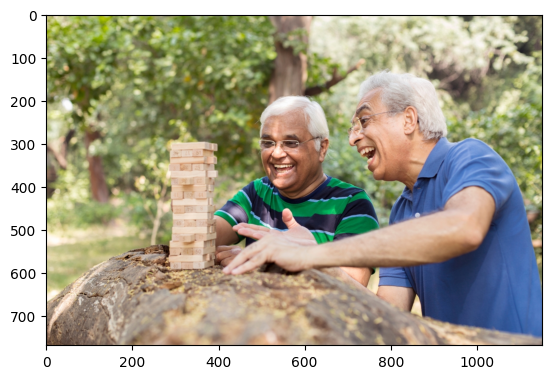

In [152]:
# plt.imshow(img)
# wierd color of image because open cv reads images in BGR and matplotlib in RGB, to fix this we use cv2
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


Why we use cv2 library in Python?
OpenCV is a Python library that allows you to perform image processing and computer vision tasks.
It provides a wide range of features, including object detection, face recognition, and tracking.

In [153]:
img.shape # image pixel shown...768,1152.... 3 is showing colored picture..rgb

(768, 1152, 3)

In [154]:
for image_class in os.listdir(data_dir): # happy sad images  # making numpy array of all images using cv2
    for image in os.listdir(os.path.join(data_dir,image_class)): # all actual images of both happy and sad
        image_path = os.path.join(data_dir,image_class,image) # adress of image
        #error handling
        #removing images which have weired extension
        try:
            img = cv2.imread(image_path) #checking if image is compatible with open cv
            tip = imghdr.what(image_path) #function to  check weiered image extension
            if tip not in image_extx:
                print('image not in ext list{}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('issue with the image{}'.format(image_path))

# 3. Load data

In [155]:
import numpy as np
from matplotlib import pyplot as plt

In [156]:
# tf.keras.utils.image_dataset_from_directory??

In [157]:
data = tf.keras.utils.image_dataset_from_directory("data")
# creating pipeline of dataset using keras... keras is inside tensor.
# tf dataset is an api
# 2 classes are happy and sad
# tf.keras.utils.image_dataset_from_directory()
#Then calling image_dataset_from_directory(main_directory, labels='inferred') will return a tf.data.Dataset that yields batches
# of images from the subdirectories class_a and class_b,together with labels 0 and 1 
#(0 corresponding to class_a and 1 corresponding to class_b).

Found 162 files belonging to 2 classes.


In [158]:
data_iterator = data.as_numpy_iterator() # looping through dataset through numpy, we cannot access through data directionly by just indexing


In [159]:
data_iterator

In [160]:
batch = data_iterator.next() # accessing pipeline, grab 1 batch back


In [161]:
len(batch) # image and labels

2

In [162]:
# Images Represented as Numpy arrays
batch[0]

array([[[[208.375    , 210.28125  , 202.73438  ],
         [185.90509  , 192.04688  , 179.97598  ],
         [120.02991  , 129.0299   , 110.56116  ],
         ...,
         [ 67.9476   ,  73.47885  ,  67.21323  ],
         [ 66.359375 ,  71.359375 ,  65.359375 ],
         [ 62.453125 ,  67.453125 ,  61.453125 ]],

        [[209.45956  , 210.23633  , 202.77264  ],
         [189.79752  , 193.43555  , 182.22287  ],
         [138.02142  , 146.20502  , 127.92761  ],
         ...,
         [ 70.9736   ,  75.9736   ,  69.67383  ],
         [ 67.62088  ,  72.62088  ,  66.21268  ],
         [ 65.084564 ,  70.084564 ,  63.67636  ]],

        [[209.2601   , 209.2601   , 201.2601   ],
         [186.8164   , 188.8164   , 177.80658  ],
         [159.81195  , 163.53629  , 146.53629  ],
         ...,
         [ 75.744415 ,  79.275665 ,  72.275665 ],
         [ 71.       ,  76.       ,  69.       ],
         [ 70.01367  ,  75.01367  ,  68.01367  ]],

        ...,

        [[169.33633  , 155.43008  ,  5

In [163]:
# labels are represented by 0,1
batch[1]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0])

In [164]:
# 0 label is happy and 1 label is sad....we find that from images down. 
# maximum value of color(255)


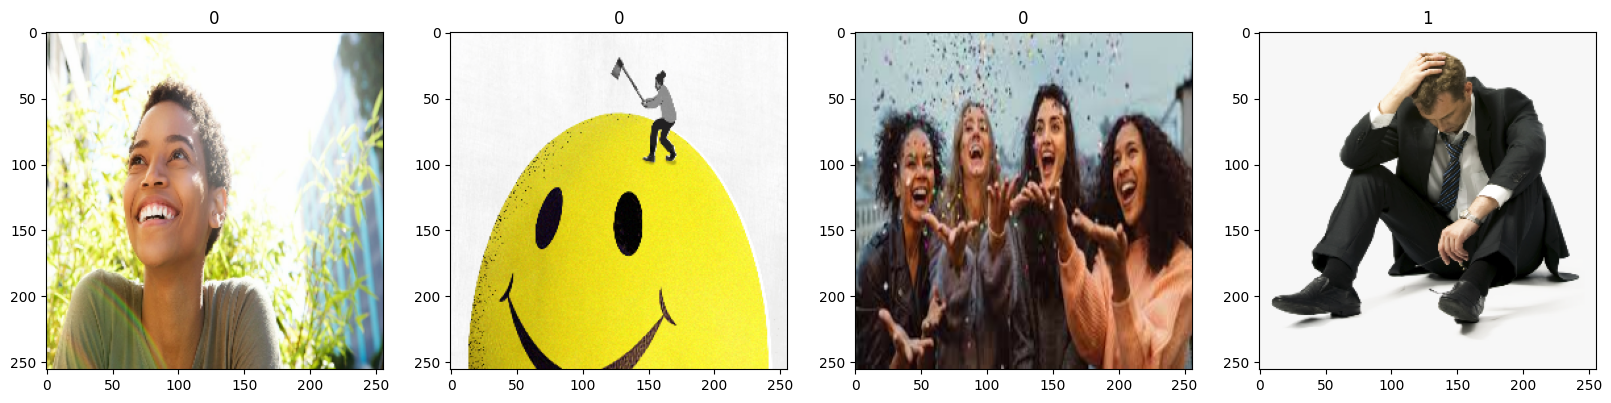

In [165]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20)) #two variables for 2 batches... 1 variable fig contain images, 2 variable ax contain labels(0,1)
for idx,img in enumerate(batch[0][:4]): # enumerate or range
    ax[idx].imshow(img.astype(int)) # show 0,1
    ax[idx].title.set_text(batch[1][idx]) # title set  image ...image k uper 0,1  aaye

## 4. Preprocess Data
###   Scaling of Data

In [166]:
data = data.map(lambda x,y:(x/255,y))  # X is features(image), y is target variable i.e label(0,1)
# transformation of data perform by .map function  .... Image Batch vaues lies between o and 1 by dividing by 255

In [167]:
 # data.as_numpy_iterator().next()  #seeing next batch from 0.... o k ander batch h unme se batch liya h

In [168]:
scaled_iterator = data.as_numpy_iterator() # moving insisde pipeline... 1/1 krke sabhi images pe jayga...taking 2 batch... images after first 10


In [169]:
batch = scaled_iterator.next()

In [170]:
batch[0].max() # 0 batch k ander maximum check kiya

1.0

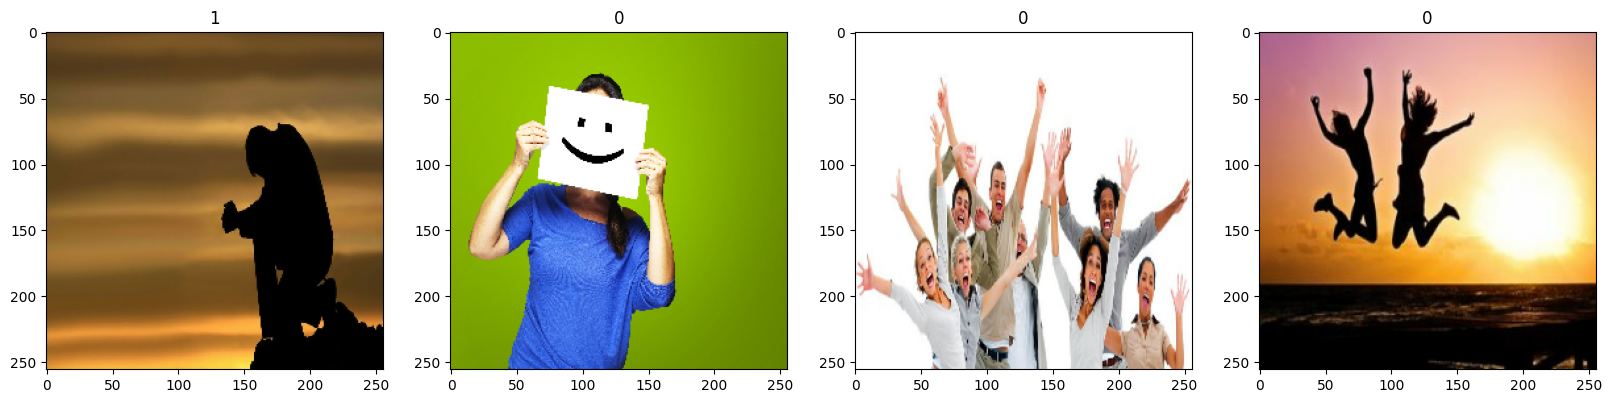

In [171]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20)) #two variables for 2 batches... 1 variable fig contain images, 2 variable ax contain labels(0,1)
for idx,img in enumerate(batch[0][:4]): # enumerate or range
    ax[idx].imshow(img) # show 0,1
    ax[idx].title.set_text(batch[1][idx]) # title set  image ...image k uper 0,1  aaye

## split data

In [172]:
len(data) #seeing total batches 

6

In [173]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)  #cross validation...divide training data to check accuracy
test_size = int(len(data)*.2)

In [174]:
train_size

4

In [175]:
val_size


1

In [176]:
test_size

1

In [177]:
train_size + val_size + test_size # all batches are 6

6

In [178]:
train = data.take(train_size) # to take training data inside variable train
                              #take includes first 4 batches

In [179]:
val = data.skip(train_size).take(val_size) # to take batches after 4
                                           #skip include batches after first four

In [180]:
test = data.skip(train_size + val_size).take(test_size) # ta take batches after 5

# 5. Build Deep learning model

In [181]:
train                    #spec html me hota ha    # basically hum shape dekh rhe h

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

#### first import dependencies including tensor flow


In [182]:
from tensorflow.keras.models import Sequential # functional Api can also be used
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [183]:
model = Sequential()

#### Building deep neural network by using different types of layers


In [185]:
model.add(Conv2D(16,(3,3),1,activation='relu', input_shape=(256,256,3))) #16 is number of filters 
model.add(MaxPooling2D())                                                #(3,3) is Kernel size, 1 is stride value

model.add(Conv2D(32,(3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten()) # Flatten convert 2D layers into single vector

model.add(Dense(256, activation='relu')) #256 neurons in dense layer
model.add(Dense(1, activation='sigmoid')) # final layer , sigmoid function shows 0 and 1 which represent happy or sad

#### Relu activation function convert negative values to zero.. positive values remain same

In [188]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

# optimizer is adam... binary classification problem we are solving
# accuracy classifies how well oue model is classifying images


In [189]:
model.summary() 

# parameter zero means not a trainable layer
# flateen reduce dimesnsion..from multidimesion to single dimension.

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)      

- 257 is weight of neurons plus bias factors

### Training Model


In [190]:
logdir = 'logs'

In [191]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [192]:
#train a model through model.fit() function
hist = model.fit(train,epochs=20, validation_data=val, callbacks=[tensorboard_callback]) 

Epoch 1/20
4/4 [==============================] - 19s 3s/step - loss: 1.6374 - accuracy: 0.4141 - val_loss: 0.9978 - val_accuracy: 0.3438
Epoch 2/20
4/4 [==============================] - 14s 3s/step - loss: 0.7676 - accuracy: 0.4297 - val_loss: 0.6596 - val_accuracy: 0.5625
Epoch 3/20
4/4 [==============================] - 13s 3s/step - loss: 0.6558 - accuracy: 0.5703 - val_loss: 0.5903 - val_accuracy: 0.6250
Epoch 4/20
4/4 [==============================] - 13s 3s/step - loss: 0.6482 - accuracy: 0.5781 - val_loss: 0.6224 - val_accuracy: 0.8125
Epoch 5/20
4/4 [==============================] - 13s 3s/step - loss: 0.5782 - accuracy: 0.7656 - val_loss: 0.6598 - val_accuracy: 0.5625
Epoch 6/20
4/4 [==============================] - 13s 3s/step - loss: 0.5619 - accuracy: 0.7422 - val_loss: 0.5758 - val_accuracy: 0.7500
Epoch 7/20
4/4 [==============================] - 13s 3s/step - loss: 0.5369 - accuracy: 0.7188 - val_loss: 0.4336 - val_accuracy: 0.8438
Epoch 8/20
4/4 [==================

In [193]:
hist.history

{'loss': [1.6373968124389648,
  0.7676293253898621,
  0.6557773351669312,
  0.6481853127479553,
  0.5781847238540649,
  0.5619176030158997,
  0.5368781089782715,
  0.4403511881828308,
  0.3651479184627533,
  0.30755841732025146,
  0.23801960051059723,
  0.23148638010025024,
  0.2920977473258972,
  0.25083690881729126,
  0.19653086364269257,
  0.1875048577785492,
  0.12125930190086365,
  0.08615196496248245,
  0.06122080981731415,
  0.028487633913755417],
 'accuracy': [0.4140625,
  0.4296875,
  0.5703125,
  0.578125,
  0.765625,
  0.7421875,
  0.71875,
  0.859375,
  0.90625,
  0.90625,
  0.8984375,
  0.9140625,
  0.875,
  0.9296875,
  0.9140625,
  0.921875,
  0.9765625,
  0.953125,
  0.9921875,
  1.0],
 'val_loss': [0.9977870583534241,
  0.6596287488937378,
  0.5903406143188477,
  0.6224286556243896,
  0.6598472595214844,
  0.5757733583450317,
  0.43359071016311646,
  0.39188820123672485,
  0.20815542340278625,
  0.20451390743255615,
  0.225077286362648,
  0.23846295475959778,
  0.16134

## plot performance

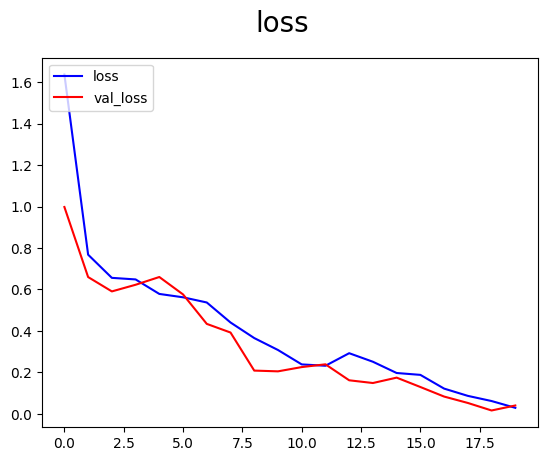

In [196]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'blue', label = 'loss')
plt.plot(hist.history['val_loss'],color = 'red', label = 'val_loss')
fig.suptitle('loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

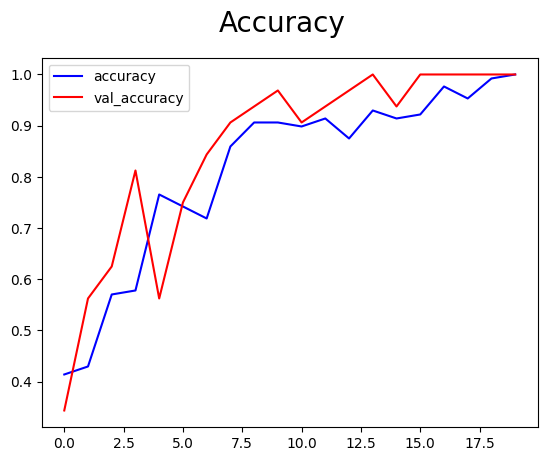

In [197]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='blue', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='red', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()


## 6. Evaluate Performance of model

In [198]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [199]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [200]:
len(test)

1

In [201]:
for batch in test.as_numpy_iterator():
    x,y = batch  # x set of images, y ture values
    yhat = model.predict(x) # this is how we make prediction
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 355ms/step


In [202]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


## 7. Evaluating performance of model on unknown images

In [247]:
import cv2

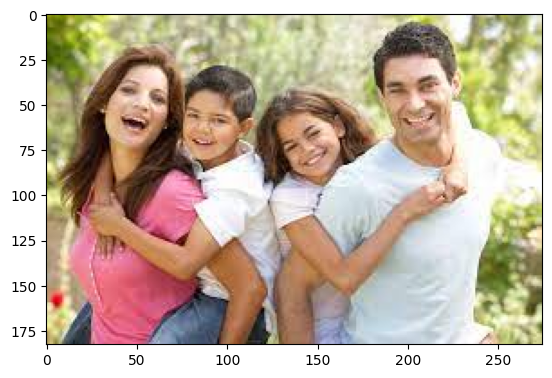

In [256]:
image = cv2.imread(os.path.join('data','hapytest.jpg'))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

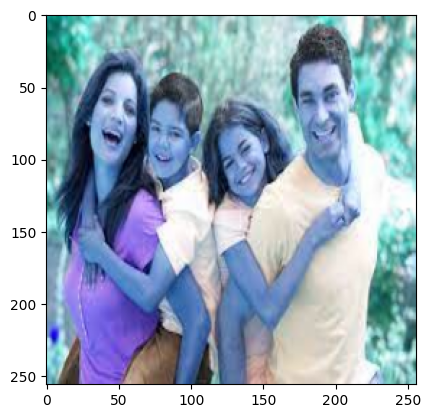

In [257]:
resize = tf.image.resize(image, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [258]:
resize.shape

TensorShape([256, 256, 3])

In [259]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [260]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 80ms/step


In [261]:
yhat

array([[0.15513717]], dtype=float32)

In [262]:
if yhat > 0.5:
    print(f'Predicted class is sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


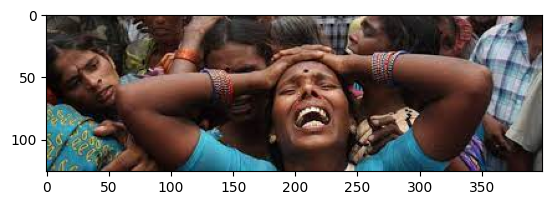

In [240]:
image = cv2.imread(os.path.join('data','sadtest.jpg'))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

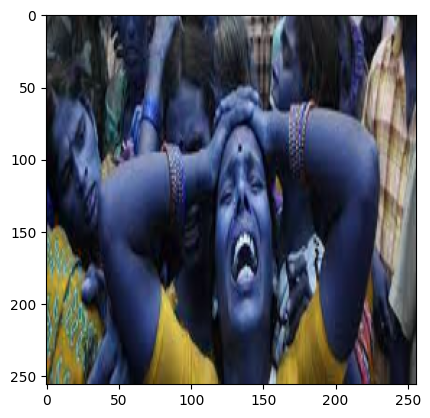

In [242]:
resize = tf.image.resize(image, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show

In [243]:
resize.shape

TensorShape([256, 256, 3])

In [244]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [245]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 76ms/step


array([[0.7979161]], dtype=float32)

In [246]:
if yhat > 0.5:
    print(f'Predicted class is sad')
else:
    print(f'Predicted class is Happy')

Predicted class is sad
